# Exploiting Correlation

Financial Data is meant not only to process data but to understand how meaningful factores can be used to summarize or represent the data. 

Let's understand the role that correlation and pricipal components play.

A. Generate 5 uncorrelated Gaussian random variables that simulate yield changes.(they can be positive or negative with mean close to 0 and a standard deviation that is small).

- To generate 5 uncorrelated Gaussian random variables, you can use a standard normal distriubution with a mean of 0 and a standard deviation of 1. In python, can use numpy's `np.random.normal` function to generate these variables.

In [3]:
import numpy as np

# Generate 5 uncorrealted Gaussian random variables
mean = 0
std_dev = 0.01

np.random.seed(0)
data = np.random.normal(mean, std_dev, (100, 5))

print(data)


[[ 1.76405235e-02  4.00157208e-03  9.78737984e-03  2.24089320e-02
   1.86755799e-02]
 [-9.77277880e-03  9.50088418e-03 -1.51357208e-03 -1.03218852e-03
   4.10598502e-03]
 [ 1.44043571e-03  1.45427351e-02  7.61037725e-03  1.21675016e-03
   4.43863233e-03]
 [ 3.33674327e-03  1.49407907e-02 -2.05158264e-03  3.13067702e-03
  -8.54095739e-03]
 [-2.55298982e-02  6.53618595e-03  8.64436199e-03 -7.42165020e-03
   2.26975462e-02]
 [-1.45436567e-02  4.57585173e-04 -1.87183850e-03  1.53277921e-02
   1.46935877e-02]
 [ 1.54947426e-03  3.78162520e-03 -8.87785748e-03 -1.98079647e-02
  -3.47912149e-03]
 [ 1.56348969e-03  1.23029068e-02  1.20237985e-02 -3.87326817e-03
  -3.02302751e-03]
 [-1.04855297e-02 -1.42001794e-02 -1.70627019e-02  1.95077540e-02
  -5.09652182e-03]
 [-4.38074302e-03 -1.25279536e-02  7.77490356e-03 -1.61389785e-02
  -2.12740280e-03]
 [-8.95466561e-03  3.86902498e-03 -5.10805138e-03 -1.18063218e-02
  -2.81822283e-04]
 [ 4.28331871e-03  6.65172224e-04  3.02471898e-03 -6.34322094e-03

B. Run a Pricipal Components using EITHER the correlation OR covariance matrix

- To run a Principal Component Analysis(PCA), can use the correlation matrix since the variables are uncorrelated. In python, can use sklearn's PCA function to perform the analysis. Make sure to stadardize the data before performing PCA if you're using the covariance matrix.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# b. Run PCA using the correlation matrix
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
pca = PCA()
pca.fit(data_standardized)


PCA()

C. Write a paragraph explaining how the variances of each component compare with each other. In this paragraph, you will address the following question: how much variance is explained by Component 1, Component 2, Component 3?

- After performing PCA, can obtain the explained variance ratio for each component. This ratio tells how much variance in the data is explained by each principal component. Can sum these ration to understand the cumulative variance explained by the components. In this case should report the variance explained by the first three components.

In [6]:
# c. Explained variance by each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by Component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by Component 2: {explained_variance[1]:.2f}")
print(f"Explained variance by Component 3: {explained_variance[2]:.2f}")

Explained variance by Component 1: 0.25
Explained variance by Component 2: 0.23
Explained variance by Component 3: 0.21


D. Produce a screeplot (see https://en.wikipedia.org/wiki/Scree_plot) of the variance explained for each component.

- A scree plot is a line plot of the variance of the principal components. The plot helps to visually assess which principal components are most important. Can create this plot using `matplotlib` in python, plotting the explained variance ratio on the `y-axis` and the component number on the `x-axis`.

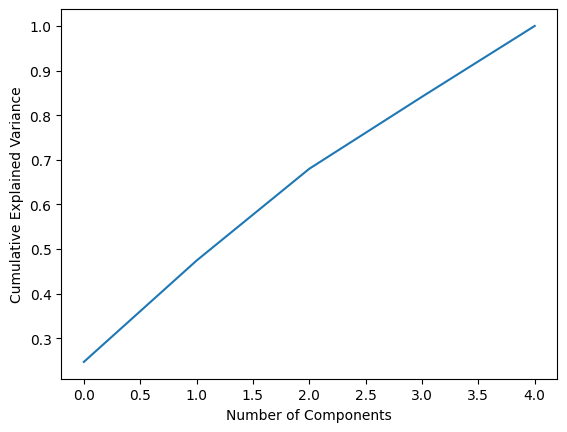

In [7]:
import matplotlib.pyplot as plt

# d. Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Now, let's Work with Real data:

a. Collect the daily closing yields for 5 government securities, say over 6 months.

 - To collect the daily closing for 5 US government securities over 6 month using python , can utilize Federal Reserve Economic Data(FRED) API provided by the Federal Reserve Bank of St.Louis. 

1. Sign up for a FRED API key: need to signup for an API key from the FRED websit.
2. Install the necessary Python libraries: Need the `pandas` and `fredapi` libraries.
 - `pip install pandas fredapi`

3. write the python script: use the following script to collect the data:

In [2]:
import pandas as pd
from fredapi import Fred

# FRED API key
fred = Fred(api_key="95eb212842318d85c6198945d6514bf4")

# List of FRED series IDs for 5 US government securities
series_ids = [
    'DGS1MO',  # 1-Month Treasury Constant Maturity Rate
    'DGS3MO',  # 3-Month Treasury Constant Maturity Rate
    'DGS6MO',  # 6-Month Treasury Constant Maturity Rate
    'DGS1',    # 1-Year Treasury Constant Maturity Rate
    'DGS2'     # 2-Year Treasury Constant Maturity Rate
]


#Define the date range for the last 6 months
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(months=6)).strftime('%Y-%m-%d')

# Collect the data
data = {}
for series_id in series_ids:
    data[series_id] = fred.get_series(series_id, start_date, end_date)


# Convert to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('us_government_securities_yields.csv')

            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2
2024-07-22    5.49    5.43    5.24  4.88  4.50
2024-07-23    5.49    5.41    5.22  4.85  4.40
2024-07-24    5.50    5.40    5.19  4.82  4.37
2024-07-25    5.49    5.39    5.19  4.83  4.41
2024-07-26    5.49    5.38    5.18  4.79  4.36
...            ...     ...     ...   ...   ...
2025-01-10    4.42    4.36    4.27  4.25  4.40
2025-01-13    4.42    4.37    4.30  4.24  4.40
2025-01-14    4.42    4.36    4.29  4.22  4.37
2025-01-15    4.40    4.35    4.26  4.19  4.27
2025-01-16    4.43    4.34    4.26  4.18  4.23

[129 rows x 5 columns]


This script will collect the daily closing yields for the specified US government securities over the last 6 months and display in a Data Frame.